# Assignment 1 - Ridge and LASSO Regression

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [87]:
sales = pd.read_csv('home_data.csv')

np.random.seed(416)

In [88]:
# Selects 1% of the data
sales = sales.sample(frac=0.01, random_state=0) 

print(f'Number of points: {len(sales)}')
sales.head()

Number of points: 216


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17384,1453602313,20141029T000000,297000,2,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
722,2225059214,20140808T000000,1578000,4,3.25,4670,51836,2.0,0,0,...,12,4670,0,1988,0,98005,47.6350,-122.164,4230,41075
2680,2768000270,20140625T000000,562100,2,0.75,1440,3700,1.0,0,0,...,7,1200,240,1914,0,98107,47.6707,-122.364,1440,4300
18754,6819100040,20140624T000000,631500,2,1.00,1130,2640,1.0,0,0,...,8,1130,0,1927,0,98109,47.6438,-122.357,1680,3200
14554,4027700666,20150426T000000,780000,4,2.50,3180,9603,2.0,0,2,...,9,3180,0,2002,0,98155,47.7717,-122.277,2440,15261


## Q1 - Feature Engineering
First, we do a bit of feature engineering by creating features that represent the squares of each feature and the square root of each feature. One benefit of using regularization is you can include more features than necessary and you don't have to be as worried about overfitting since the model is regularized.

In [89]:
### edTest(test_feature_extraction) ###

from math import sqrt

# All of the features of interest
selected_inputs = [
    'bedrooms', 
    'bathrooms',
    'sqft_living', 
    'sqft_lot', 
    'floors', 
    'waterfront', 
    'view', 
    'condition', 
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built', 
    'yr_renovated'
]


all_features = []
for feature_name in selected_inputs:
    
    squared_feature_name = feature_name + '_square'
    sqrt_feature_name = feature_name + '_sqrt'

    sales[squared_feature_name] = sales[feature_name]**2
    
    sales[sqrt_feature_name] = np.sqrt(sales[feature_name])

    all_features.extend([feature_name, squared_feature_name, sqrt_feature_name])

price = sales['price']
sales = sales[all_features]

sales.head()

,bedrooms,bedrooms_square,bedrooms_sqrt,bathrooms,bathrooms_square,bathrooms_sqrt,sqft_living,sqft_living_square,sqft_living_sqrt,sqft_lot,...,sqft_above_sqrt,sqft_basement,sqft_basement_square,sqft_basement_sqrt,yr_built,yr_built_square,yr_built_sqrt,yr_renovated,yr_renovated_square,yr_renovated_sqrt
17384,2,4,1.414214,1.50,2.2500,1.224745,1430,2044900,37.815341,1650,...,37.815341,0,0,0.000000,1999,3996001,44.710178,0,0,0.0
722,4,16,2.000000,3.25,10.5625,1.802776,4670,21808900,68.337398,51836,...,68.337398,0,0,0.000000,1988,3952144,44.586994,0,0,0.0
2680,2,4,1.414214,0.75,0.5625,0.866025,1440,2073600,37.947332,3700,...,34.641016,240,57600,15.491933,1914,3663396,43.749286,0,0,0.0
18754,2,4,1.414214,1.00,1.0000,1.000000,1130,1276900,33.615473,2640,...,33.615473,0,0,0.000000,1927,3713329,43.897608,0,0,0.0
14554,4,16,2.000000,2.50,6.2500,1.581139,3180,10112400,56.391489,9603,...,56.391489,0,0,0.000000,2002,4008004,44.743715,0,0,0.0


## Split Data

In [90]:
from sklearn.model_selection import train_test_split

sales_train_and_validation, sales_test, price_train_and_validation, price_test = \
    train_test_split(sales, price, test_size=0.2, random_state=6)
sales_train, sales_validation, price_train, price_validation = \
    train_test_split(sales_train_and_validation, price_train_and_validation, test_size=.125, random_state=6) # .10 (validation) of .80 (train + validation)

## Q2 - Standardization

We first need to do a little bit more pre-processing to prepare the data for model training. Models like Ridge and LASSO assume the input features are standardized (mean 0, std. dev. 1) and the target values are centered (mean 0).

Standardize the data in train, validation, and test

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(sales_train)

sales_train_standardized = scaler.transform(sales_train)
sales_validation_standardized = scaler.transform(sales_validation)
sales_test_standardized = scaler.transform(sales_test)

# Linear Regression 
## Q3) Linear Regression Baseline


In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_regression = LinearRegression()
linear_regression.fit(sales_train_standardized, price_train)

predictions = linear_regression.predict(sales_test_standardized)

rmse_test_unregularized = np.sqrt(mean_squared_error(price_test, predictions))
print("Test RMSE", rmse_test_unregularized)

Test RMSE 384955.79936972965


--- 
# Ridge Regression

In this section, we will do some **hyper-parameter tuning** to find the optimal setting of the regularization constant $\lambda$ for Ridge Regression. Remember that $\lambda$ is the coefficient that controls how much the model is penalized for having large weights in the optimization function.

$$\hat{w}_{ridge} = \min_w MSE(w) + \lambda \left\lVert w \right\rVert_2^2$$

where $\left\lVert w \right\rVert_2^2 = \sum_{j=1}^D w_j^2$ is the $l_2$-norm of the parameters. By default, `sklearn`'s `Ridge` class does not regularize the intercept.

## Q4) Train Ridge Models
For this part of the assignment, you will be writing code to find the optimal setting of the penalty $\lambda$. Below, we describe what steps you will want to have in your code to compute these values:

*Implementation Details*
* Use the following choices of $l_2$ penalty: $[10^{-5}, 10^{-4}, ..., 10^4, 10^5]$. In Python, you can create a list of these numbers using `np.logspace(-5, 5, 11, base=10)`. 
* Use the [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) class from sklearn to train a Ridge Regression model on the **training** data. The **only** arguments you need to pass when constructing the Ridge model are $\lambda$, which lets you specify what you want the $l_2$ penalty to be. (NOTE: sklearn's Ridge class uses `alpha` instead of `lambda`; only the name is different but they function in the same way.)
* Evaluate both the training error and the validation error for the model by reporting the **RMSE** of each dataset.
* **Put all of your results in a pandas `DataFrame` named `ridge_data`** so you can analyze them later. The `ridge_data` should have a row for each $l_2$ penalty you tried and should have the following columns:
  * `l2_penalty`: The $l_2$ penalty for that row
  * `model`: The actual `Ridge` model object that was trained with that $l_2$ penalty
  * `rmse_train`: The training RMSE for that model
  * `rmse_validation`: The validation RMSE for that model
* To build up this `DataFrame`, we recommend first building up a list of dictionary objects and then converting that to a `DataFrame`. For example, the following code would produce the following `pandas.DataFrame`.

  ```python
  data = []
  for i in range(3):
      data.append({
          'col_a': i,
          'col_b': 2 * i
      }
  data_frame = pd.DataFrame(data)
  ```

  | col_a | col_b | 
  |-------|-------|
  |   0   |   0   | 
  |   1   |   2   | 
  |   2   |   4   |

In [93]:
from sklearn.linear_model import Ridge

l2_lambdas = np.logspace(-5, 5, 11, base = 10)

results = []

for l in l2_lambdas:
  model = Ridge(l)

  model.fit(sales_train_standardized, price_train)

  pred_train = model.predict(sales_train_standardized)
  pred_val = model.predict(sales_validation_standardized)

  rmse_train = np.sqrt(mean_squared_error(price_train, pred_train))
  rmse_val = np.sqrt(mean_squared_error(price_validation, pred_val))

  results.append({
    'l2_penalty': l,
    'model': model,
    'rmse_train': rmse_train,
    'rmse_validation': rmse_val
  })

ridge_data = pd.DataFrame(results)
ridge_data

,l2_penalty,model,rmse_train,rmse_validation
0,0.00001,Ridge(alpha=np.float64(1e-05)),146188.566942,392112.522240
1,0.00010,Ridge(alpha=np.float64(0.0001)),146210.884175,392721.061565
2,0.00100,Ridge(alpha=np.float64(0.001)),146610.292053,393099.892724
3,0.01000,Ridge(alpha=np.float64(0.01)),147967.692703,369263.393012
4,0.10000,Ridge(alpha=np.float64(0.1)),151619.819399,330722.661247
5,1.00000,Ridge(alpha=np.float64(1.0)),154932.690092,302623.478585
6,10.00000,Ridge(alpha=np.float64(10.0)),161876.430362,282876.469131
7,100.00000,Ridge(alpha=np.float64(100.0)),181371.431142,283001.128683
8,1000.00000,Ridge(alpha=np.float64(1000.0)),244296.061524,341022.423065
9,10000.00000,Ridge(alpha=np.float64(10000.0)),328840.881425,486101.010743


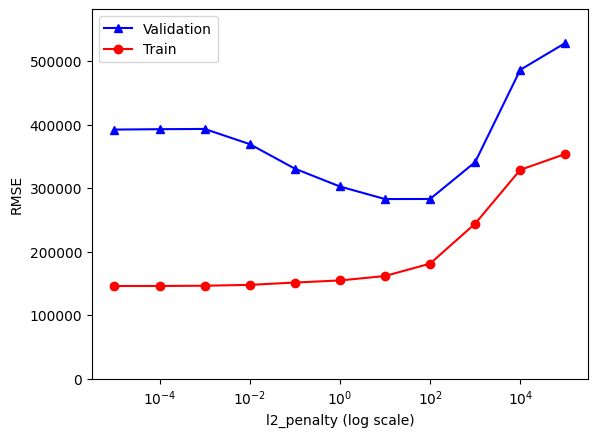

In [94]:
plt.plot(ridge_data['l2_penalty'], ridge_data['rmse_validation'], 
         'b-^', label='Validation')

plt.plot(ridge_data['l2_penalty'], ridge_data['rmse_train'], 
         'r-o', label='Train')

rmse_max = max(ridge_data['rmse_train'].max(), ridge_data['rmse_validation'].max())
rmse_max *= 1.1
plt.ylim(0, rmse_max)

plt.xscale('log')

plt.xlabel('l2_penalty (log scale)')
plt.ylabel('RMSE')
plt.legend()

In [95]:
def print_coefficients(model, features):
    """
    This function takes in a model column and a features column. 
    And prints the coefficient along with its feature name.
    """
    feats = list(zip(features, model.coef_))
    print(*feats, sep = "\n")

## Q5 - Inspecting Coefficients
In the cell below, write code that uses the `ridge_data` `DataFrame` to select which L2 penalty we would choose based on the evaluations we did in the previous section.

In [96]:
best_row = ridge_data.loc[ridge_data['rmse_validation'].idxmin()]

best_l2 = best_row['l2_penalty']
rmse_test_ridge = np.sqrt(mean_squared_error(price_test, best_row['model'].predict(sales_test_standardized)))
num_zero_coeffs_ridge = np.sum(best_row['model'].coef_ == 0)

print('L2 Penalty',  best_l2)
print('Test RSME', rmse_test_ridge)
print('Num Zero Coeffs', num_zero_coeffs_ridge)

L2 Penalty 10.0
Test RSME 354624.847251947
Num Zero Coeffs 0


--- 
# LASSO Regression
In this section you will do basically the exact same analysis you did with Ridge Regression, but using LASSO Regression instead. It's okay if your code for this section looks very similar to your code for the last section. 

Remember that for LASSO we choose the parameters that minimize this quality metric instead 

$$\hat{w}_{LASSO} = \min_w MSE(w) + \lambda \left\lVert w \right\rVert_1$$

where $\left\lVert w \right\rVert_1 = \sum_{j=1}^D | w_j |$ is the L1 norm of the parameter vector.

## Q6) Train LASSO Models
We will use the same set of instructions for LASSO as we did for Ridge, except for the following differences. Please refer back to the Ridge Regression instructions and your code to see how these differences fit in!

* Use the [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso) model. Like before, the only parameters you need to pass in are $\lambda$ for the L1 penalty. Like before, sklearn uses the parameter `alpha` instead of `lambda`, but it does the same thing as the `lambda` we discussed in class.
* The range L1 penalties should be $[10, 10^2, ..., 10^7]$. In Python, this is `np.logspace(1, 7, 7, base=10)`.
* The result should be stored in a `DataFrame` named `lasso_data`. All the columns should have the same name and corresponding values except the penalty column should be called `l1_penalty`.
* It is okay if your code prints some `ConvergenceWarning` warnings, these should not impact your results!.

In [97]:
from sklearn.linear_model import Lasso

l1_lambdas = np.logspace(1, 7, 7, base=10)

results = []

for l in l1_lambdas:
  model = Lasso(l)

  model.fit(sales_train_standardized, price_train)

  pred_train = model.predict(sales_train_standardized)
  pred_val = model.predict(sales_validation_standardized)

  rmse_train = np.sqrt(mean_squared_error(price_train, pred_train))
  rmse_val = np.sqrt(mean_squared_error(price_validation, pred_val))

  results.append({
    'l1_penalty': l,
    'model': model,
    'rmse_train': rmse_train,
    'rmse_validation': rmse_val
  })

lasso_data = pd.DataFrame(results)
lasso_data

/Users/ameliali/GitHub/CSE416/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.653e+12, tolerance: 1.913e+09
  model = cd_fast.enet_coordinate_descent(
/Users/ameliali/GitHub/CSE416/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.000e+12, tolerance: 1.913e+09
  model = cd_fast.enet_coordinate_descent(
/Users/ameliali/GitHub/CSE416/.venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

,l1_penalty,model,rmse_train,rmse_validation
0,10.0,Lasso(alpha=np.float64(10.0)),151336.667973,335371.150569
1,100.0,Lasso(alpha=np.float64(100.0)),152164.419039,323670.679137
2,1000.0,Lasso(alpha=np.float64(1000.0)),156360.395434,285201.302593
3,10000.0,Lasso(alpha=np.float64(10000.0)),169912.542560,271138.560249
4,100000.0,Lasso(alpha=np.float64(100000.0)),239553.336550,340385.511537
5,1000000.0,Lasso(alpha=np.float64(1000000.0)),357105.698956,533861.713077
6,10000000.0,Lasso(alpha=np.float64(10000000.0)),357105.698956,533861.713077


Like before, let's look at how the L1 penalty affects the performance.

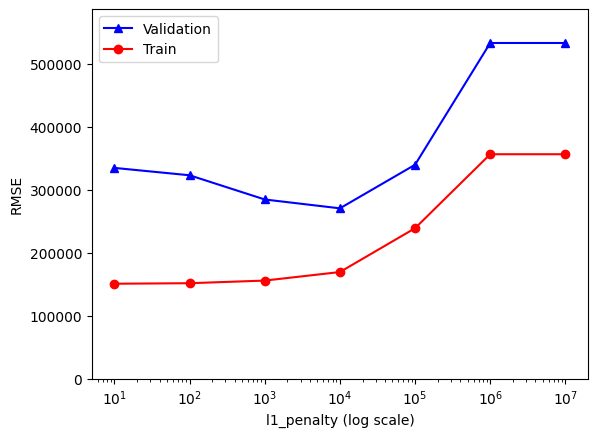

In [98]:
plt.plot(lasso_data['l1_penalty'], lasso_data['rmse_validation'],
         'b-^', label='Validation')

plt.plot(lasso_data['l1_penalty'], lasso_data['rmse_train'],
         'r-o', label='Train')

rmse_max = max(lasso_data['rmse_train'].max(), lasso_data['rmse_validation'].max())
rmse_max *= 1.1
plt.ylim(0, rmse_max)

plt.xscale('log')

plt.xlabel('l1_penalty (log scale)')
plt.ylabel('RMSE')
plt.legend()

## Q7 - Inspecting Coefficients
Like before, in the cell below, write code that uses the `lasso_data` `DataFrame` to select which L1 penalty we would choose based on the evaluations we did in the previous section. Do not hard-code the best model paramteres, write code to find the best model from the values you compute from the DataFrame. Compute the following:

In [99]:
best_row = lasso_data.loc[lasso_data['rmse_validation'].idxmin()]

best_l1 = best_row['l1_penalty']
rmse_test_lasso = np.sqrt(mean_squared_error(price_test, best_row['model'].predict(sales_test_standardized)))
num_zero_coeffs_lasso = np.sum(best_row['model'].coef_ == 0)

print('Best L1 Penalty', best_l1)
print('Test RMSE', rmse_test_lasso)
print('Num Zero Coeffs', num_zero_coeffs_lasso)

Best L1 Penalty 10000.0
Test RMSE 344434.8333379938
Num Zero Coeffs 29


Let's look at which coefficients ended up having a 0 coefficient. In the cell below, we print the name of all features with coefficient 0. Note, we actually have to check if it is near 0 since numeric computations in Python sometimes yield slight rounding errors (e.g., how 1/3 is .333333333333 and that can't be represented precisely in a computer)


In [100]:
best_model_lasso = best_row['model']

zero_coef_features = []
nonzero_coef_features = []
for feature, coef in zip(all_features, best_model_lasso.coef_):
  if abs(coef) <= 10 ** -17:
    zero_coef_features.append(feature)
  else:
    nonzero_coef_features.append(feature)

print("Features with coefficient == 0:", zero_coef_features)
print("Features with coefficient != 0:", nonzero_coef_features)

Features with coefficient == 0: ['bedrooms', 'bedrooms_square', 'bathrooms', 'bathrooms_sqrt', 'sqft_living', 'sqft_living_square', 'sqft_living_sqrt', 'sqft_lot', 'sqft_lot_sqrt', 'floors', 'floors_square', 'waterfront_square', 'waterfront_sqrt', 'view', 'view_square', 'view_sqrt', 'condition', 'condition_square', 'condition_sqrt', 'grade', 'grade_sqrt', 'sqft_above', 'sqft_above_sqrt', 'sqft_basement', 'sqft_basement_square', 'sqft_basement_sqrt', 'yr_built_square', 'yr_renovated', 'yr_renovated_sqrt']
Features with coefficient != 0: ['bedrooms_sqrt', 'bathrooms_square', 'sqft_lot_square', 'floors_sqrt', 'waterfront', 'grade_square', 'sqft_above_square', 'yr_built', 'yr_built_sqrt', 'yr_renovated_square']
